# 权重衰减实验

## 使用高维线性回归实验进行操作
高维函数如下：
$$
y=0.05+\sum_{i=1}^p 0.01x_i+ \epsilon
$$

In [6]:
import matplotlib.pyplot as plot
class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        # d2l.use_svg_display()
        self.fig, self.axes = plot.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: plot.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [7]:
import torch
from torch import nn

#构造数据集
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 1
true_w,true_b=torch.ones(num_inputs,1),0.05
features=torch.randn((n_train+n_test,num_inputs))
labels=torch.matmul(features,true_w)+torch.normal(0.0,0.01,size=(n_train+n_test,1))
train_features,test_features=features[:n_train,:],features[n_train:,:]
train_labels,test_labels=labels[:n_train],labels[n_train:]
dataset = torch.utils.data.TensorDataset(train_features, train_labels)
train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)


In [12]:
loss=nn.MSELoss()
# 权重衰减
def train(wd,lr,num_epochs):
    animator=Animator(xlabel='epochs', ylabel='loss', yscale='log',xlim=[5, num_epochs], legend=['train', 'test'])
    net=nn.Sequential(nn.Linear(num_inputs,1))
    # 参数初始化
    for param in net.parameters():
        param.data.normal_()
    optimizer_w = torch.optim.SGD(params=[net[0].weight], lr=lr, weight_decay=wd) # 对权重参数衰减
    optimizer_b = torch.optim.SGD(params=[net[0].bias], lr=lr)  # 不对偏差参数衰减
    for epoch in range(num_epochs):
        for X,y in train_iter:
            l=loss(net(X),y).mean()
            optimizer_w.zero_grad()
            optimizer_b.zero_grad()
            l.backward()
            optimizer_w.step()
            optimizer_b.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
        

TypeError: len() of a 0-d tensor

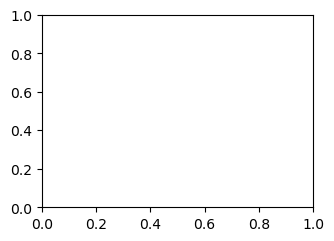

In [13]:
train(0,0.003,100)